# Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\abhij\Desktop\Heart Disease\heart.csv")

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
#check for missing values
data.isnull().sum() 

#Drop missing values (or use imputation)
data.dropna(inplace=True)

# Feature Enginerring

In [14]:
#One-hot encoding for categorical columns
data = pd.get_dummies(data, drop_first = True)

# Exploratory Data analysis(EDA)

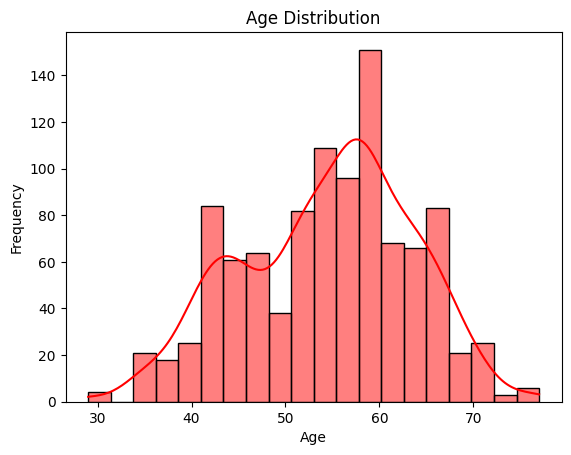

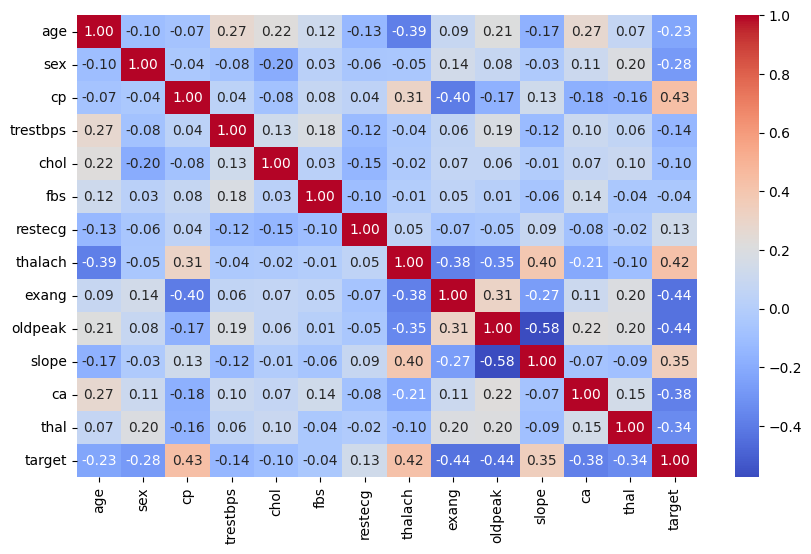

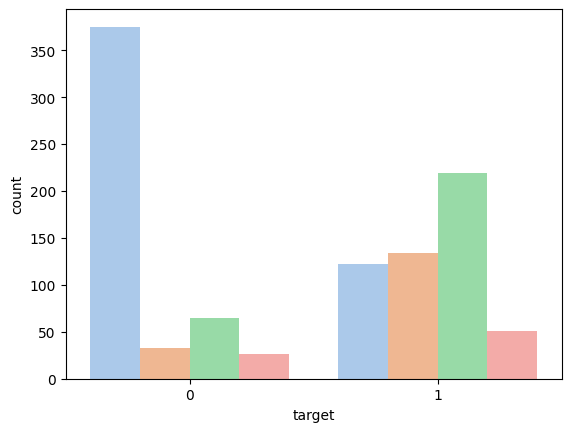

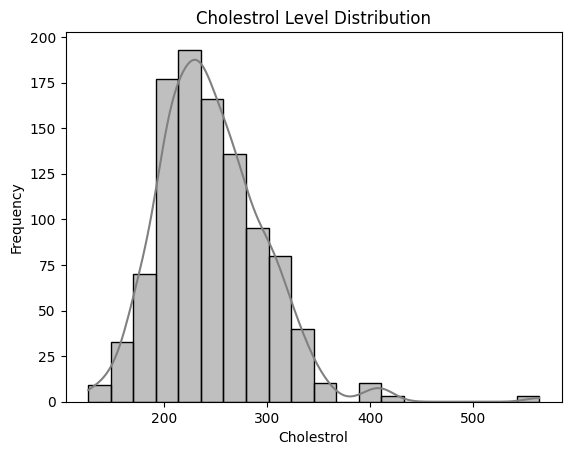

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#visualize the distribution of numeric variables
sns.histplot(data['age'], kde=True, bins=20, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#Distribution of target varibale (presence of heart disease)
sns.countplot(x='target', data=data, hue='cp',palette='pastel', legend=False)
plt.show()

#Distribution of cholestrol levels
sns.histplot(data['chol'], kde=True, bins=20, color='grey')
plt.title('Cholestrol Level Distribution')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.show()

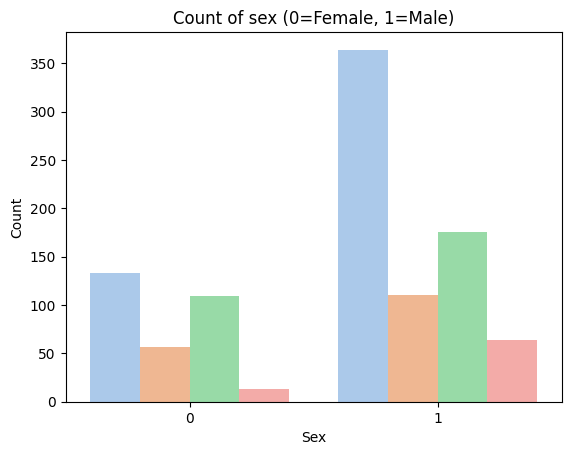

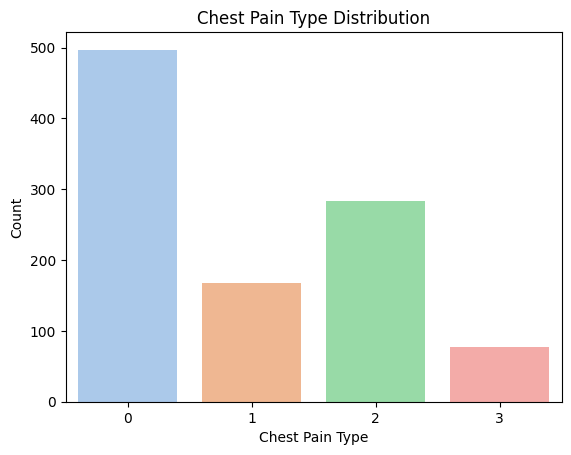

In [18]:
#Countplot for sex (male vs. female)
sns.countplot(x='sex', data=data, hue='cp',palette='pastel', legend=False)
plt.title('Count of sex (0=Female, 1=Male)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#Countplot for chest pain types
sns.countplot(x='cp', data=data, hue='cp',palette='pastel', legend=False)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

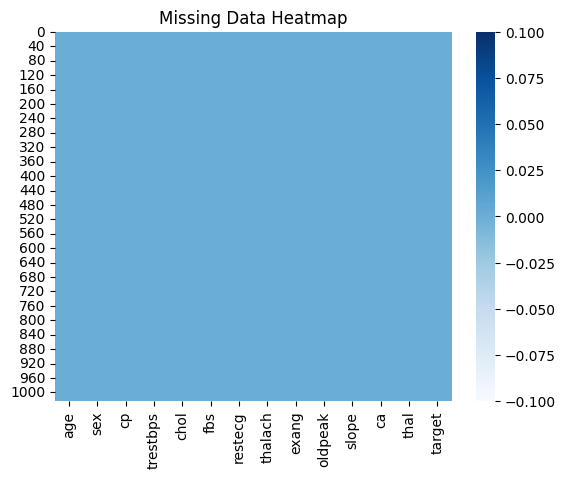

In [19]:
import seaborn as sns
sns.heatmap(data.isnull(), cbar=True, cmap='Blues')
plt.title('Missing Data Heatmap')
plt.show()

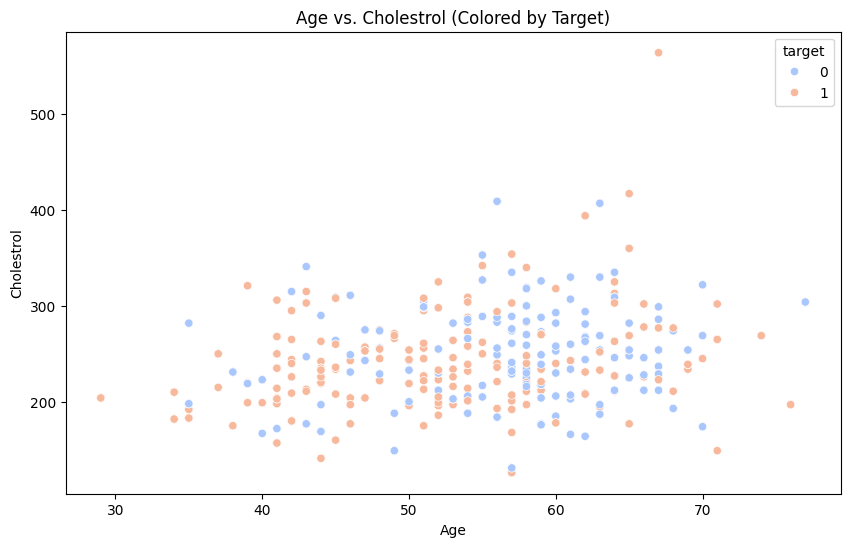

In [20]:
#Scatter plot for age vs. cholestrol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=data, palette='coolwarm')
plt.title('Age vs. Cholestrol (Colored by Target)')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.show()

# Split Data into Trian and Test Sets

In [22]:
from sklearn.model_selection import train_test_split
x = data.drop('target', axis=1)
y = data['target']  #target varuable (heart disease presence)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Selection

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#create and train the model 
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

#Prediction
y_pred = model.predict(x_test)

#Model Evluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.80
[[73 29]
 [13 90]]


# Model Evaluation

In [26]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print('ROC-AUC: {roc_Auc:.2f}')

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

ROC-AUC: {roc_Auc:.2f}


# Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Valid penalties
    'solver': ['liblinear']  # Compatible solver for 'l1' and 'l2'
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print('Best Parameters:', grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


# Feature Importance

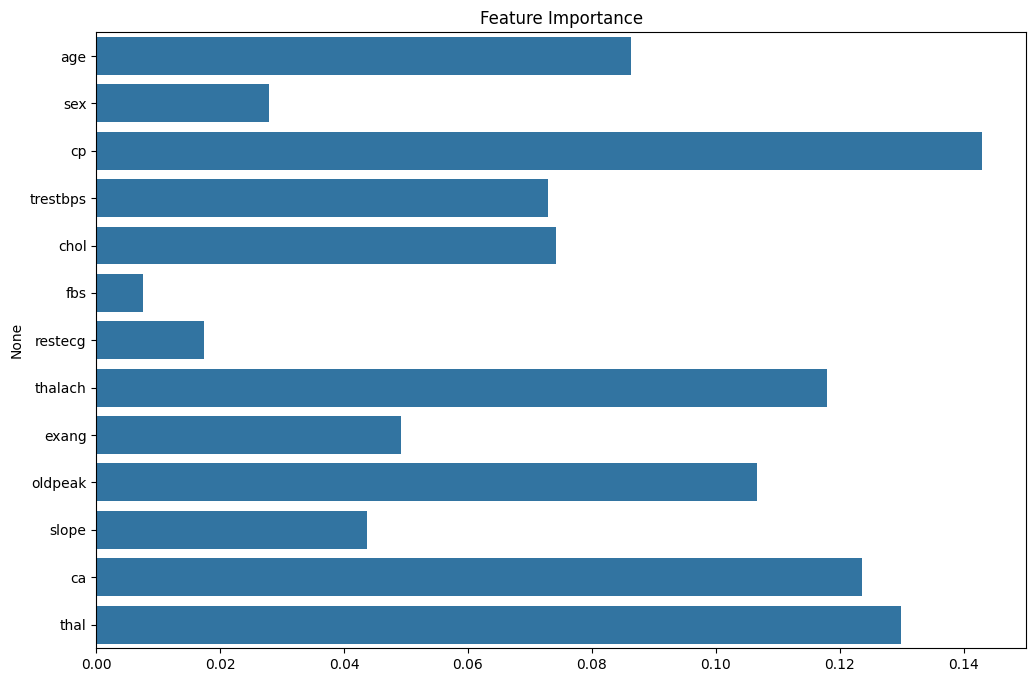

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
rf_model.fit(x_train, y_train)

#Feature Importamce
importances = rf_model.feature_importances_
features = x.columns

#Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

# Model Deployment

In [72]:
import joblib
#Save the model
joblib.dump(model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']